# Case 1. Heart Disease Classification   
Joona Klemetti  
4.2.2018   
Cognitive Systems for Health Technology Applications    
Helsinki Metropolia University of Applied Science

#  1. Objectives   
The aim of this case is learn to manipulate and read data from externals sources using panda’s functions and use keras dense neural networks to make an expert system to support in diagnostic decision making.   
<br>
After the neural network and the expert system is made it's intended to examine how number of nodes, layers and epochs affects to systems reliability. Also it's tested how batch size 
and train-test distribution affects the results.


# 2. Required libraries   
At first it is necessary to import all libraries. In this assignment is used numpy to scientific computing and creating multidimensional arrays, matplotlib to ploting figures, pandas to data analysis and handling, scikit-learn to preprocessing data and spliting it train and test groups and keras to build the neural network.

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
# Check the versions
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('sklearn:', sk.__version__)
print('keras:', keras.__version__)

numpy: 1.12.1
pandas: 0.22.0
sklearn: 0.19.1
keras: 2.1.2


# 3. Data description and preprocessing   
Data consists four different datasets with numerical information of heart disease diagnosis. All datasets is modified in same formation. Because of that it was easy to merge them to one data frame. For more information of used datasets it is recommended to visit original information file made by David Aha https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names    
<br>
At first datasets is imported to dataframes and merged to one dataframe. After that data is described and analysed with figures and tables. Data preprocessing is continued for replacing missing values with column mode values. Mode values is elected because mean values could harm some atributes i.e. 'thal' column mean value is 5.088 but its mode value is 3. Mode value means most common value. Because 'thal' value should be 3, 6 or 7 it is recommended to use mode values instead of mean values.   
<br>
Next step is to define the labels. Data frames 'num' value represent persons health condition. If 'num' value is 0 person is healthy otherwise person got heart disease. Label is the output value and in this case it should be 1 or 0, true or false. After defining the labels it is needed to drop 'num' atribute from training set. Next the data frame is converted to the numerical array and it is scaled between 0 and 1. That is important because otherwise small numerical values may remain insignificant. Last task before defining the neural network is divide the data for training and testing sets. It is decided to use 30% of data to testing set and it is executed by using train_test_split() function from scikit-learn library.

In [3]:
# location of datasets
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
filename2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
filename3 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

# column names for data
colnames = ['age','sex','cp','trestbps',
            'chol','fbs','restecg','thalach',
            'exang','oldpeak','slope','ca','thal','num']

# read datas to data frames
df1 = pd.read_csv(filename,
                 names = colnames,
                 na_values = '?')

df2 = pd.read_csv(filename1,
                 names = colnames,
                 na_values = '?')

df3 = pd.read_csv(filename2,
                 names = colnames,
                 na_values = '?')

df4 = pd.read_csv(filename3,
                 names = colnames,
                 na_values = '?')

# merge all 4 data frames to one data frame 
frames = [df1,df2,df3,df4] 

df = pd.concat(frames)

df.index = range(920)

In [4]:
# calculate descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


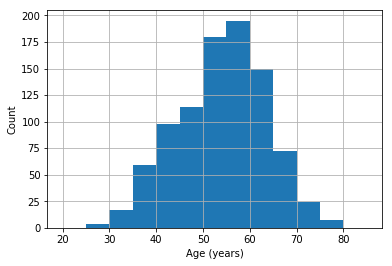

In [5]:
# Create histogram of age distribution
df['age'].hist(bins = np.arange(20, 90, 5))
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

In [6]:
# Replace missing values with column mode values
df = df.where(~np.isnan(df), df.mode(), axis = 'columns')

In [7]:
# Calculate the labels:
# Output value: = 0 Normal,  0 > Heart disaese
label = (df['num'] > 0).values

In [8]:
#Select the columns for training
columns = ['age','sex','cp','trestbps',
            'chol','fbs','restecg','thalach',
            'exang','oldpeak','slope','ca','thal']
#Convert data into numerical array
data = df[columns].values

In [9]:
# Scale the data using min_max_scaler
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [16]:
# dividing the data for training and testing

train_data, test_data, train_label, test_label = train_test_split(
data, label, test_size = 0.35)

# 4. Modeling and compilation   
In this case it is choosed to use Keras Sequential model to build dense neural network. At first architecture of network is defined and layers is added via .add() method. Compilation is have to done before training. Compilation configures the learning process. According the formula Nh=Ns(α∗(Ni+No)) number of nodes should be between 6 and 32. It is decided to use 10 nodes for both hidden layers because that seems to work best.

In [17]:
# Define the architecture of the network

network = []
network = models.Sequential()
network.add(layers.Dense(10, activation= 'relu', input_shape=(13,)))
network.add(layers.Dense(10, activation= 'relu', ))
network.add(layers.Dense(1, activation= 'sigmoid'))

In [18]:
# Compile the network

network.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

# 5. Training and Validation   
Next step is train the network. Training is executed with .fit() method.

In [19]:
#Train the network
# N = number of epochs
N = 120

h = network.fit(train_data, train_label,
            verbose = 0,
            epochs = N, 
            batch_size=128,
            validation_data=(test_data, test_label)
            )

# 6. Evaluation   
Evaluation is made by .evaluate() method. It computes testing sets loss function and accuracity. 

In [20]:
# Evaluation the network
score = network.evaluate(test_data, test_label, batch_size = 128)
score

322/322 [==============================] - 0s 25us/step


[0.44718356051059982, 0.79813665040531512]

# 7. Results and Discussion   
In the testing neural network it is noticed that regardless choosen number of node and train-test distribution the accuracy and loss function will be about same. Either batch size doesn't seems to affect ressults. Accuracy stays in range 0.77 to 0.85 generally. Loss function is between 0.40 and 0.50. If number of nodes increase too much there is noticed big variation in test accuracy and loss function. Best train-test distribution would seem to be about 70% to training and 30% to testing. Small variation in train-test distribution isn't harmful. Optimal number of nodes seems to be between 8 to 15. Adding more layers doesn't seems to affect scores either. Randomness seems to affect a lot of accuracy and loss function. 


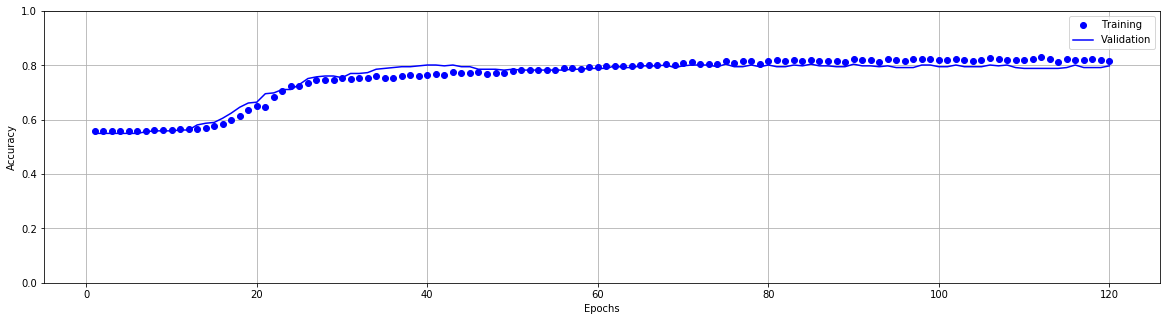

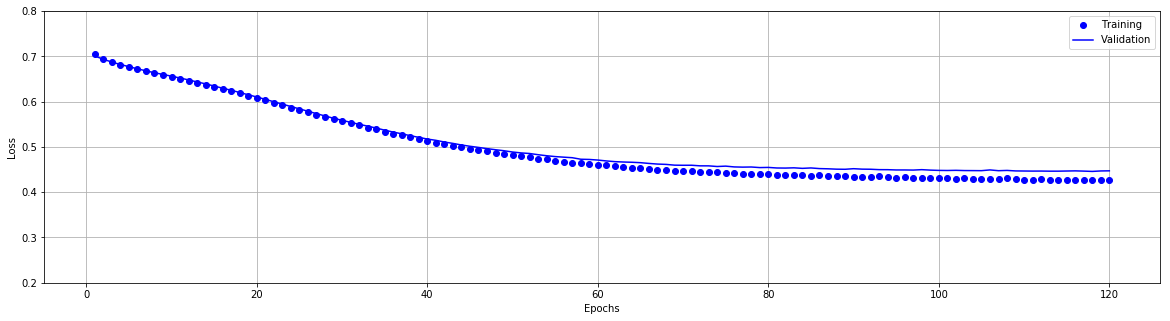

In [21]:
# Plot the results

epochs = range(1, N + 1)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0.2, 0.8])
plt.grid()
plt.legend()
plt.show()


# 8. Conclusions   
The case 1. was very good introduction to the neural networks. I think the difficulty level was just right at this point. The objectives were achieved such the neural network works.   
<br>
There was a little variation of results. Even there were used the same atributes randomness seems to affect the results. That must be due to train_test_split() function. Function splits data into random train and test sets. Therefore, there was variation in the results.   
<br>
About 80% accuracy is fine but in diagnostic medical system it isn't enough. Even if accuracy would always be 85% it is still too poor. There should be more patient data and system have to be developed before using in real situations. Even though system is used only to support diagnostic decision making. 